In [5]:
from citation_network.scholarly import get_pub_from_scholarly, download_pdf
from citation_network.crawler import get_roots
from citation_network.scholarly import get_pub_from_scholarly

In [7]:
get_pub_from_scholarly("attention is all you need").keys()

dict_keys(['container_type', 'source', 'bib', 'filled', 'gsrank', 'pub_url', 'author_id', 'url_scholarbib', 'url_add_sclib', 'num_citations', 'citedby_url', 'url_related_articles', 'eprint_url'])

In [12]:
get_pub_from_scholarly("attention is all you need")

{'container_type': 'Publication',
 'source': <PublicationSource.PUBLICATION_SEARCH_SNIPPET: 'PUBLICATION_SEARCH_SNIPPET'>,
 'bib': {'title': 'Attention is all you need',
  'author': ['A Vaswani'],
  'pub_year': '2017',
  'venue': 'Advances in Neural Information Processing Systems',
  'abstract': 'Attention is all you need Attention is all you need'},
 'filled': False,
 'gsrank': 1,
 'pub_url': 'https://user.phil.hhu.de/~cwurm/wp-content/uploads/2020/01/7181-attention-is-all-you-need.pdf',
 'author_id': ['oR9sCGYAAAAJ'],
 'url_scholarbib': '/scholar?hl=en&q=info:5Gohgn6QFikJ:scholar.google.com/&output=cite&scirp=0&hl=en',
 'url_add_sclib': '/citations?hl=en&xsrf=&continue=/scholar%3Fq%3Dattention%2Bis%2Ball%2Byou%2Bneed%26hl%3Den%26as_sdt%3D0,33&citilm=1&update_op=library_add&info=5Gohgn6QFikJ&ei=2GJqZ5eJIui96rQP4aet-Qk&json=',
 'num_citations': 146474,
 'citedby_url': '/scholar?cites=2960712678066186980&as_sdt=5,33&sciodt=0,33&hl=en',
 'url_related_articles': '/scholar?q=related:5Gohgn

In [5]:
BASE_PATH = '/Users/rezatabrizi/documents/test'
os.makedirs(BASE_PATH, exist_ok=True)
paper = get_pub_from_scholarly("DeepHawkes: Bridging the Gap between Prediction and Understanding of Information Cascades")
print(paper)
download_pdf(paper['eprint_url'], os.path.join(BASE_PATH, f'{paper["bib"]["title"]}.pdf'))

{'container_type': 'Publication', 'source': <PublicationSource.PUBLICATION_SEARCH_SNIPPET: 'PUBLICATION_SEARCH_SNIPPET'>, 'bib': {'title': 'Deephawkes: Bridging the gap between prediction and understanding of information cascades', 'author': ['Q Cao', 'H Shen', 'K Cen', 'W Ouyang'], 'pub_year': '2017', 'venue': 'Proceedings of the 2017 …', 'abstract': "Online social media remarkably facilitates the production and delivery of information, intensifying the competition among vast information for users' attention and highlighting the importance of predicting the popularity of information. Existing approaches for popularity prediction fall into two paradigms: feature-based approaches and generative approaches. Feature-based approaches extract various features (eg, user, content, structural, and temporal features), and predict the future popularity of information by training a regression"}, 'filled': False, 'gsrank': 1, 'pub_url': 'https://dl.acm.org/doi/abs/10.1145/3132847.3132973', 'author

KeyError: 'eprint_url'

In [ ]:
import requests

def get_paper_references(paper_id, api_key=None):
    url = f"https://api.semanticscholar.org/graph/v1/paper/{paper_id}?fields=references"
    headers = {}
    if api_key:
        headers["x-api-key"] = api_key

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        references = data.get('references', [])
        return references
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None
    

paper_id = "arXiv:1906.09032"
references = get_paper_references(paper_id)
if references:
    print("References:")
    for ref in references:
        print(f"- Title: {ref.get('title')}, Authors: {[author['name'] for author in ref.get('authors', [])]}")

In [32]:
import requests

def get_references_by_doi(doi, api_key=None):
    url = f"https://api.semanticscholar.org/graph/v1/paper/DOI:{doi}?fields=references"
    headers = {}
    if api_key:
        headers["x-api-key"] = api_key

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data.get('references', [])
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# Example DOI
doi = "10.1145/3132847.3132973"  # Replace with your ACM DOI
references = get_references_by_doi(doi)

if references:
    print("References:")
    for ref in references:
        print(f"- Title: {ref.get('title')}, Authors: {[author['name'] for author in ref.get('authors', [])]}")


References:
- Title: GPOP: Scalable Group-level Popularity Prediction for Online Content in Social Networks, Authors: []
- Title: Predicting the Popularity of Online Content with Group-specific Models, Authors: []
- Title: Modeling the Intensity Function of Point Process Via Recurrent Neural Networks, Authors: []
- Title: Neural Survival Recommender, Authors: []
- Title: DeepCas: An End-to-end Predictor of Information Cascades, Authors: []
- Title: Feature Driven and Point Process Approaches for Popularity Prediction, Authors: []
- Title: Recurrent Marked Temporal Point Processes: Embedding Event History to Vector, Authors: []
- Title: A Peek Into the Future: Predicting the Popularity of Online Videos, Authors: []
- Title: Modeling and Predicting Retweeting Dynamics via a Mixture Process, Authors: []
- Title: Predictability of Popularity: Gaps between Prediction and Understanding, Authors: []
- Title: Expecting to be HIP: Hawkes Intensity Processes for Social Media Popularity, Authors:

In [55]:
import requests

def get_paper_id_by_title(title, api_key=None):
    url = "https://api.semanticscholar.org/graph/v1/paper/search"
    params = {"query": title, "fields": "paperId,title"}
    headers = {"x-api-key": api_key} if api_key else {}

    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        papers = data.get("data", [])
        if papers:
            return papers[0]["paperId"]
        else:
            print("No paper found for the given title.")
            return None
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# Example usage
title = "node2vec: Scalable Feature Learning for Networks"
paper_id = get_paper_id_by_title(title)

if paper_id:
    print(f"Paper ID for '{title}': {paper_id}")


Paper ID for 'node2vec: Scalable Feature Learning for Networks': 36ee2c8bd605afd48035d15fdc6b8c8842363376


In [44]:
from bs4 import BeautifulSoup
import requests
import re

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
res = requests.get("https://ieeexplore.ieee.org/abstract/document/6248110/",  headers=headers, timeout=10)
pdf_regex = r'href=["\'](.*?\.pdf)["\']'
pdf_links = re.findall(pdf_regex, res.text)
pdf_links

['https://ieeexplore.ieee.org/xpl/contact\' target=\'_blank\'>contact us</a> for more information.","pdfPricingInfo":[{"memberPrice":"$14.95","nonMemberPrice":"$33.00","partNumber":"6248110","type":"PDF/HTML"}]},"getProgramTermsAccepted":false,"sections":{"abstract":"true","authors":"true","figures":"true","multimedia":"false","references":"true","citedby":"true","keywords":"true","definitions":"false","algorithm":"false","dataset":"false","cadmore":"false","footnotes":"true","disclaimer":"false","relatedContent":"false","metrics":"true"},"rightsLink":"http://s100.copyright.com/AppDispatchServlet?publisherName=ieee&publication=proceedings&title=Multi-column+deep+neural+networks+for+image+classification&isbn=978-1-4673-1226-4&publicationDate=June+2012&author=Dan+Ciregan&ContentID=10.1109/CVPR.2012.6248110&orderBeanReset=true&startPage=3642&endPage=3649&proceedingName=2012+IEEE+Conference+on+Computer+Vision+and+Pattern+Recognition","displayPublicationDate":"16-21 June 2012","authorNames"

In [ ]:
import requests



res = requests.get("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5667668/", headers=headers, timeout=10)

try:
    res.raise_for_status()  # Check if the request was successful
    print(res.text)  # Use res.content for binary data
except requests.exceptions.HTTPError as e:
    print(f"HTTP Error: {e}")
except Exception as e:
    print(f"Other Error: {e}")


In [ ]:
next(scholarly.citedby(get_publication("can cascades be preditec?")))

{'container_type': 'Publication',
 'source': <PublicationSource.PUBLICATION_SEARCH_SNIPPET: 'PUBLICATION_SEARCH_SNIPPET'>,
 'bib': {'title': 'Retrieval-augmented hypergraph for multimodal social media popularity prediction',
  'author': ['Z Cheng', 'J Zhang', 'X Xu', 'G Trajcevski', 'T Zhong'],
  'pub_year': '2024',
  'venue': 'Proceedings of the 30th …',
  'abstract': 'Accurately predicting the popularity of multimodal user-generated content (UGC) is fundamental for many real-world applications such as online advertising and'},
 'filled': False,
 'gsrank': 1,
 'pub_url': 'https://dl.acm.org/doi/abs/10.1145/3637528.3672041',
 'author_id': ['CU28LO0AAAAJ',
  '4tv9g08AAAAJ',
  'ra0qyRQAAAAJ',
  'Avus2kcAAAAJ',
  'Mdr0XDkAAAAJ'],
 'url_scholarbib': '/scholar?hl=en&q=info:bnJlSItWUYsJ:scholar.google.com/&output=cite&scirp=0&hl=en',
 'url_add_sclib': '/citations?hl=en&xsrf=&continue=/scholar%3Fhl%3Den%26as_sdt%3D0,33%26sciodt%3D0,33%26as_ylo%3D2024%26as_yhi%3D2024%26cites%3D1308474263585113

In [59]:
import requests
import urllib 
import os

latest_release = requests.get("http://api.semanticscholar.org/datasets/v1/release/latest").json()
dataset_ids = requests.get("http://api.semanticscholar.org/datasets/v1/release").json()
earliest_release = requests.get(f"http://api.semanticscholar.org/datasets/v1/release/{dataset_ids[0]}").json()

# Print names of datasets in the release
print("\n".join(d['name'] for d in latest_release['datasets']))



abstracts
authors
citations
embeddings-specter_v1
embeddings-specter_v2
paper-ids
papers
publication-venues
s2orc
tldrs


In [62]:
import json
papers = [json.loads(l) for l in open("samples/papers/papers-sample.jsonl", "r").readlines()]
citations = [json.loads(l) for l in open("samples/citations/citations-sample.jsonl", "r").readlines()]
embeddings = [json.loads(l) for l in open("samples/embeddings-specter_v2/embeddings-specter_v2-sample.jsonl", "r").readlines()]

# S2ORC
docs = [json.loads(l) for l in open("samples/s2orc/s2orc-sample.jsonl", "r").readlines()]
text = docs[0]['content']['text']
annotations = {k: json.loads(v) for k, v in docs[0]['content']['annotations'].items() if v}

for a in annotations['paragraph'][:10]:
    print(a)
for a in annotations['bibref'][:10]:
    print(a)
for a in annotations['bibentry'][:10]:
    print(a)

def text_of(type):
    return [text[a['start']:a['end']] for a in annotations.get(type, '')]

print(text_of('abstract'))
print('\n\n'.join(text_of('paragraph')[:3]))
print('\n'.join(text_of('bibref')[:10]))

FileNotFoundError: [Errno 2] No such file or directory: 'samples/papers/papers-sample.jsonl'

In [24]:
def get_doi_from_crossref_exact(title):
    url = "https://api.crossref.org/works"
    params = {
        "query": title,
        "rows": 1000  # Fetch more results to improve matching
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()

        data = response.json()
        items = data.get("message", {}).get("items", [])

        # Iterate through results and check for an exact title match
        for item in items:
            result_title = item.get("title", [""])[0].lower().strip()
            if result_title == title.lower().strip():  # Exact match
                return {
                    "doi": item.get("DOI"),
                    "title": item.get("title")[0],
                    "authors": [f"{a.get('given', '')} {a.get('family', '')}".strip() for a in item.get("author", [])],
                    "publisher": item.get("publisher"),
                    "year": item.get("issued", {}).get("date-parts", [[None]])[0][0],
                }

        # If no exact match is found
        print("No exact match found.")
        return None

    except requests.RequestException as e:
        print(f"Error querying CrossRef API: {e}")
        return None


# Example usage
title = "CoupledGnn"
result = get_doi_from_crossref_exact(title)

if result:
    print(f"DOI: {result['doi']}")
    print(f"Title: {result['title']}")
    print(f"Authors: {', '.join(result['authors'])}")
    print(f"Publisher: {result['publisher']}")
    print(f"Year: {result['year']}")
else:
    print("No matching result found.")


arXiv ID: http://arxiv.org/api/UYhYqbTq0LccUvknj6jU1mAaQCE


In [28]:
def get_doi_from_crossref_with_author(title, author_name):
    url = "https://api.crossref.org/works"
    query = f"{title} {author_name}"  # Combine title and author name
    params = {
        "query": query,
        "rows": 10  # Fetch multiple results to validate
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()

        data = response.json()
        items = data.get("message", {}).get("items", [])

        # Iterate through results to find an exact match
        for item in items:
            result_title = item.get("title", [""])[0].lower().strip()
            print(result_title)
            if result_title == title.lower().strip():
                return {
                    "doi": item.get("DOI"),
                    "title": item.get("title")[0],
                    "authors": [f"{a.get('given', '')} {a.get('family', '')}".strip() for a in item.get("author", [])],
                    "publisher": item.get("publisher"),
                    "year": item.get("issued", {}).get("date-parts", [[None]])[0][0],
                }

        print("No exact match found.")
        return None

    except requests.RequestException as e:
        print(f"Error querying CrossRef API: {e}")
        return None

# Example usage
title = "Attention Is All You Need"
author_name = "A. Vaswani"
result = get_doi_from_crossref_with_author(title, author_name)

if result:
    print(f"DOI: {result['doi']}")
    print(f"Title: {result['title']}")
    print(f"Authors: {', '.join(result['authors'])}")
    print(f"Publisher: {result['publisher']}")
    print(f"Year: {result['year']}")
else:
    print("No matching result found.")


all you need is lsd
all you need is attention: lightweight attention-based data augmentation for text classification
attention is all you need: an analysis of the valuation of artificial intelligence tokens
attention is indeed all you need: semantically attention-guided decoding for data-to-text nlg
all you need is love(s)
attention all surveyors: our schools need you
all the attention you need: global-local, spatial-channel attention for image retrieval
rapid speaker adaptation for conformer transducer: attention and bias are all you need
attention (to virtuosity) is all you need: religious studies pedagogy and generative ai
hydrogen bonds meet self-attention: all you need for general-purpose protein structure embedding
No exact match found.
No matching result found.


In [29]:
get_pub_from_scholarly("Attention is all you need")

{'container_type': 'Publication',
 'source': <PublicationSource.PUBLICATION_SEARCH_SNIPPET: 'PUBLICATION_SEARCH_SNIPPET'>,
 'bib': {'title': 'Attention is all you need',
  'author': ['A Vaswani'],
  'pub_year': '2017',
  'venue': 'Advances in Neural Information Processing Systems',
  'abstract': 'Attention is all you need Attention is all you need'},
 'filled': False,
 'gsrank': 1,
 'pub_url': 'https://user.phil.hhu.de/~cwurm/wp-content/uploads/2020/01/7181-attention-is-all-you-need.pdf',
 'author_id': ['oR9sCGYAAAAJ'],
 'url_scholarbib': '/scholar?hl=en&q=info:5Gohgn6QFikJ:scholar.google.com/&output=cite&scirp=0&hl=en',
 'url_add_sclib': '/citations?hl=en&xsrf=&continue=/scholar%3Fq%3DAttention%2Bis%2Ball%2Byou%2Bneed%26hl%3Den%26as_sdt%3D0,33&citilm=1&update_op=library_add&info=5Gohgn6QFikJ&ei=DehqZ8vcHpOW6rQP3-rzuQM&json=',
 'num_citations': 146484,
 'citedby_url': '/scholar?cites=2960712678066186980&as_sdt=5,33&sciodt=0,33&hl=en',
 'url_related_articles': '/scholar?q=related:5Gohgn

In [30]:
def search_arxiv_with_date(title, start_date, end_date):
    url = "http://export.arxiv.org/api/query"
    params = {
        "search_query": f"ti:\"{title}\"",
        "start": 0,
        "max_results": 5,
        "sortBy": "submittedDate",
        "sortOrder": "ascending"
    }

    # Append date filters
    if start_date:
        params["start_date"] = start_date
    if end_date:
        params["end_date"] = end_date

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.text

        # Parse results
        results = []
        entries = data.split("<entry>")
        for entry in entries[1:]:
            # Extract metadata
            title_start = entry.find("<title>") + 7
            title_end = entry.find("</title>", title_start)
            result_title = entry[title_start:title_end].strip()

            id_start = entry.find("<id>") + 4
            id_end = entry.find("</id>", id_start)
            result_id = entry[id_start:id_end].strip()

            date_start = entry.find("<published>") + 11
            date_end = entry.find("</published>", date_start)
            published_date = entry[date_start:date_end].strip()

            results.append({
                "title": result_title,
                "id": result_id,
                "published_date": published_date
            })

        return results

    else:
        print(f"Error querying arXiv API: {response.status_code}")
        return None

# Example usage
title = "Attention Is All You Need"
start_date = "2017-01-01"
end_date = "2017-12-31"

results = search_arxiv_with_date(title, start_date, end_date)

if results:
    for result in results:
        print(f"Title: {result['title']}")
        print(f"arXiv ID: {result['id']}")
        print(f"Published Date: {result['published_date']}")
        print("---")
else:
    print("No matching results found.")


Title: Attention Is All You Need
arXiv ID: http://arxiv.org/abs/1706.03762v7
Published Date: 2017-06-12T17:57:34Z
---
Title: Attention is all you need for Videos: Self-attention based Video
  Summarization using Universal Transformers
arXiv ID: http://arxiv.org/abs/1906.02792v1
Published Date: 2019-06-06T19:59:56Z
---
Title: Attention Is All You Need for Chinese Word Segmentation
arXiv ID: http://arxiv.org/abs/1910.14537v3
Published Date: 2019-10-31T15:32:19Z
---
Title: Attention is All You Need in Speech Separation
arXiv ID: http://arxiv.org/abs/2010.13154v2
Published Date: 2020-10-25T16:28:54Z
---
Title: Not All Attention Is All You Need
arXiv ID: http://arxiv.org/abs/2104.04692v3
Published Date: 2021-04-10T06:24:52Z
---


In [1]:
import openalexnet as oanet
from tqdm.auto import tqdm
filterData = {
    "author.id" : "a5103024730",
    "is_paratext" : "false",
    "from_publication_date": "2000-01-01"
}

openalex = oanet.OpenAlexAPI()

entities = openalex.getEntities(entityType="works", filter=filterData)

/Users/rezatabrizi/Library/Caches/pypoetry/virtualenvs/citation-network-paDbNT47-py3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
entitiesList = []
for entity in tqdm(entities, desc="retrieving entities"):
    entitiesList.append(entity) 

retrieving entities: 100%|██████████| 80/80 [00:00<00:00, 189.60it/s]


In [45]:
networks = oanet.createNetworks(entities, networkTypes=["citation"], simplifyNetworks=True, showProgress=True)

In [46]:
g = networks["citation"]

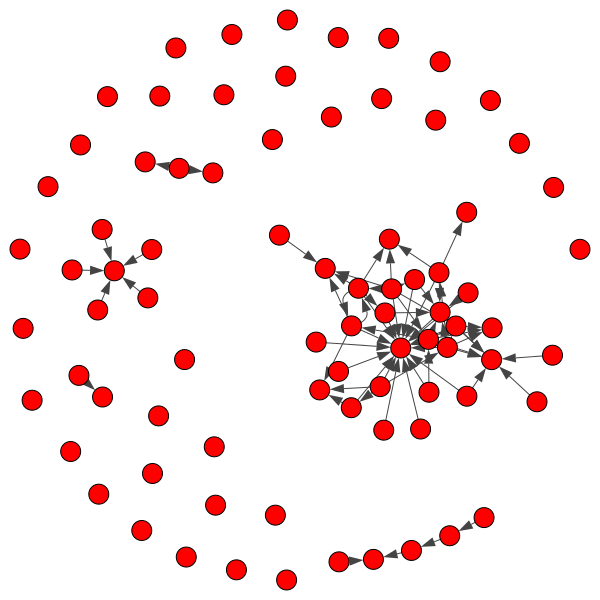

In [48]:
from igraph import plot
plot (networks["citation"])

In [53]:
adj = g.get_adjlist()
adj

[[],
 [],
 [19],
 [0, 1],
 [0, 1, 3, 6, 21],
 [0, 1, 3, 4, 6],
 [],
 [0, 1],
 [1, 3, 13, 16],
 [],
 [0, 1, 3, 4, 5, 6, 8],
 [],
 [],
 [],
 [],
 [],
 [],
 [1, 16, 19, 21, 37],
 [],
 [],
 [],
 [1, 17, 19, 20],
 [0],
 [],
 [],
 [15],
 [],
 [],
 [18],
 [1, 20],
 [15],
 [1],
 [],
 [],
 [1, 3],
 [15],
 [],
 [1, 3],
 [1, 4],
 [],
 [58],
 [],
 [],
 [44],
 [40],
 [],
 [1, 4, 5, 16, 17, 19, 34],
 [],
 [],
 [],
 [15],
 [1],
 [],
 [58],
 [],
 [],
 [],
 [],
 [],
 [15],
 [52, 69],
 [],
 [],
 [],
 [],
 [0],
 [1, 3],
 [],
 [],
 [],
 [],
 [],
 [],
 [1],
 [],
 [],
 [],
 [1, 10, 20, 29],
 [1],
 []]

In [62]:
g.vs['title']

for node, references in enumerate(g.get_adjlist()):
    print (f"{node} - {g.vs['title'][node]}: {references}")

    

0 - Attention Is All You Need: []
1 - Attention is All you Need: []
2 - Relational inductive biases, deep learning, and graph networks: [19]
3 - Self-Attention with Relative Position Representations: [0, 1]
4 - Attention Augmented Convolutional Networks: [0, 1, 3, 6, 21]
5 - Bottleneck Transformers for Visual Recognition: [0, 1, 3, 4, 6]
6 - Stand-Alone Self-Attention in Vision Models: []
7 - The Best of Both Worlds: Combining Recent Advances in Neural Machine Translation: [0, 1]
8 - Efficient Content-Based Sparse Attention with Routing Transformers: [1, 3, 13, 16]
9 - Tensor2Tensor for Neural Machine Translation: []
10 - Scaling Local Self-Attention for Parameter Efficient Visual Backbones: [0, 1, 3, 4, 5, 6, 8]
11 - Learning Whom to Trust with MACE: []
12 - One Model To Learn Them All: []
13 - Music Transformer: Generating Music with Long-Term Structure: []
14 - Tensor2Tensor for Neural Machine Translation: []
15 - Decoding with Large-Scale Neural Language Models Improves Translation

Attention is All you Need


In [ ]:
adj_list = g.get_adjlist()
node_titles = g.vs["title"]

# Create a title-based adjacency list with node numbers
title_adj_list = {
    f"{node_titles[i]}": [f"{node_titles[reference]}" for reference in references]
    for i, references in enumerate(adj_list)
}


Attention Is All You Need: []
Attention is All you Need: []
Relational inductive biases, deep learning, and graph networks: ['Self-Attention with Relative Position Representations']
Self-Attention with Relative Position Representations: []
Attention Augmented Convolutional Networks: []
Bottleneck Transformers for Visual Recognition: []
Stand-Alone Self-Attention in Vision Models: []
The Best of Both Worlds: Combining Recent Advances in Neural Machine Translation: ['Attention Is All You Need', 'Attention is All you Need']
Efficient Content-Based Sparse Attention with Routing Transformers: []
Tensor2Tensor for Neural Machine Translation: []
Scaling Local Self-Attention for Parameter Efficient Visual Backbones: []
Learning Whom to Trust with MACE: []
One Model To Learn Them All: []
Music Transformer: Generating Music with Long-Term Structure: []
Decoding with Large-Scale Neural Language Models Improves Translation: []
Image Transformer: []
Fast Decoding in Sequence Models using Discrete L

In [42]:
for pub, cites in title_adj_list.items():
    #print(cites)
    for child_pub in cites: 
        if child_pub == "Attention Is All You Need":
            print (pub)

The Best of Both Worlds: Combining Recent Advances in Neural Machine Translation
DeepConsensus improves the accuracy of sequences with a gap-aware sequence transformer


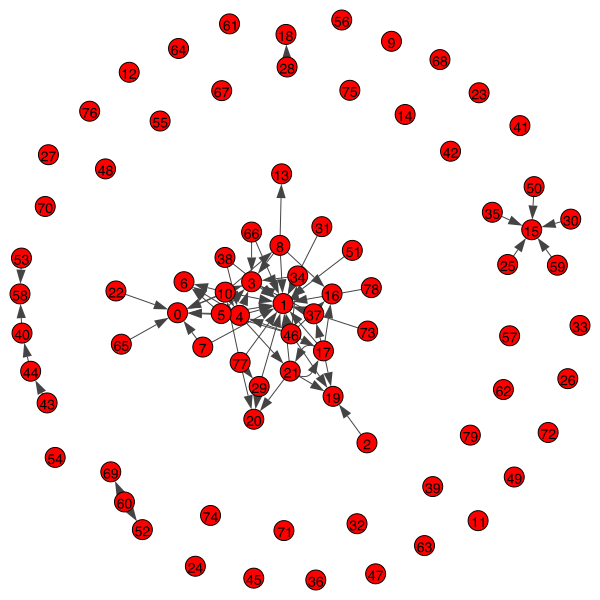

In [44]:
# Plot the graph
plot(g, bbox=(600, 600), margin=20)